# HOUSING: PRICE PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Project-Housing_splitted\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
#Some statistical insights
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

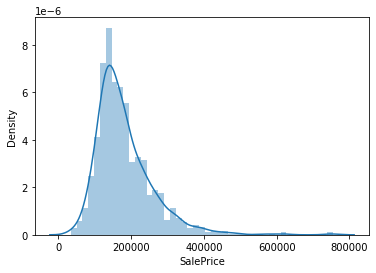

In [5]:
#Let's visualize the distribution of sale price
sns.distplot(df['SalePrice'])

In [6]:
#'Id' is just an identifier with no predictive power. So let's drop the column
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1168, 80)


In [7]:
#percentage of null values (non zero) in differend columns
col_list = list(df)
null = []
for i in df.isnull().sum()*100/df.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,18.321918
5,Alley,93.407534
24,MasVnrType,0.599315
25,MasVnrArea,0.599315
29,BsmtQual,2.568493
30,BsmtCond,2.568493
31,BsmtExposure,2.654110
32,BsmtFinType1,2.568493
34,BsmtFinType2,2.654110
56,FireplaceQu,47.174658


In [8]:
#'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are with very high number of nan values.
# Let's drop the columns
df_dropped = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print('Shape of the orginal df:', df.shape)
print('Shape after dropping:', df_dropped.shape)

Shape of the orginal df: (1168, 80)
Shape after dropping: (1168, 76)


In [9]:
#identify numerical and non-numerical columns automatically
NonNumCols = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclo

In [10]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in NonNumCols:
    value_counts.append(len(df_dropped[col].value_counts()))
data_val = {'cat_col': NonNumCols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,cat_col,value_counts
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,1
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [11]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'.
#So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_dropped[col].fillna('No Garage', inplace=True)
df_dropped['GarageYrBlt'].fillna(0, inplace=True)

In [12]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'.
# So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_dropped[col].fillna('No Basement', inplace=True)

In [13]:
#rechecking percentage of null values (non zero) in differend columns
col_list = list(df_dropped)
null = []
for i in df_dropped.isnull().sum()*100/df_dropped.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,18.321918
23,MasVnrType,0.599315
24,MasVnrArea,0.599315
55,FireplaceQu,47.174658


In [14]:
#Unique values in 'FireplaceQu'
df_dropped['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [15]:
#Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
df_dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

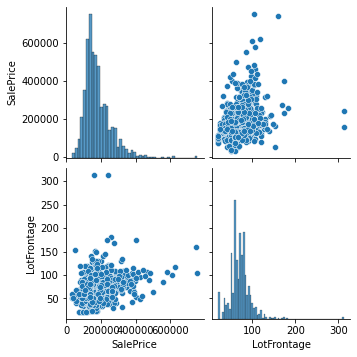

In [16]:
#Let's see how important the 'LotFrontage' column is
sns.pairplot(df_dropped[['SalePrice','LotFrontage']])

In [17]:
#'LotFrontage' is an important column. Replace missing values of LotFrontage with Median
df_dropped.loc[:,'LotFrontage'] = df_dropped.loc[:, 'LotFrontage'].fillna(df_dropped['LotFrontage'].median())

In [18]:
df_dropped.dropna(inplace = True)

In [19]:
df_dropped.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

<Figure size 1728x1728 with 0 Axes>

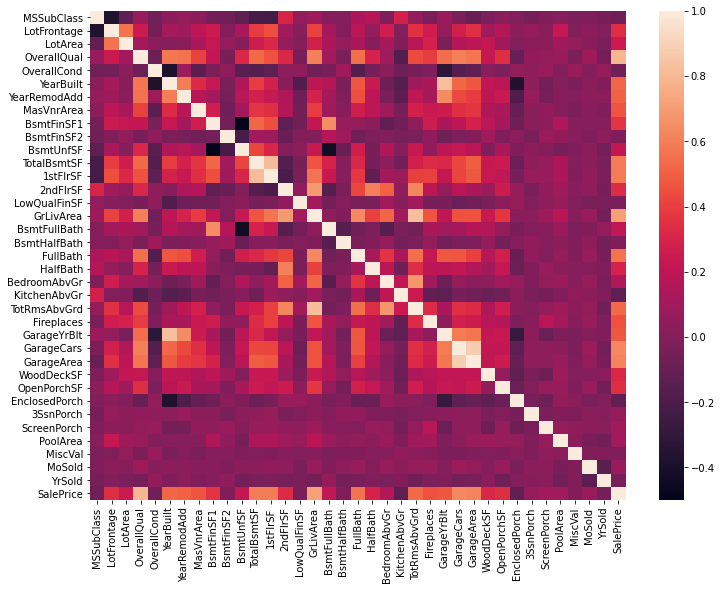

In [21]:
plt.figure(figsize=(24, 24))
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), ax=ax);

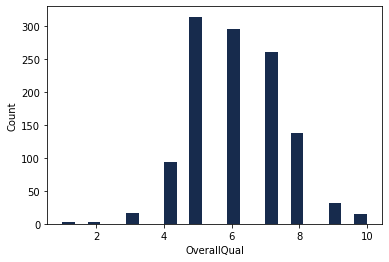

In [24]:
sns.distplot(df['OverallQual'], kde=False,
color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

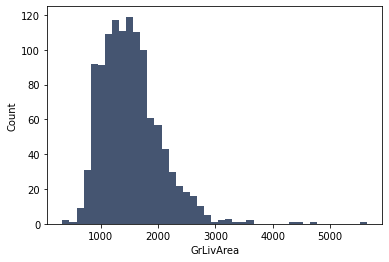

In [27]:
sns.distplot(df['GrLivArea'], kde=False,
color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

In [20]:
#Identifying highly correlated varaibles
corr_matrix = df_dropped.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [21]:
#So, let's drop these three columns
df_dropped.drop(df[col_to_drop], axis=1, inplace = True)
df_dropped.shape

(1161, 73)

## Derived features

In [22]:
#Getting the age of the houses

import datetime
df_dropped['CurrentYear'] = datetime.datetime.now().year
df_dropped["Age"] = df_dropped['CurrentYear'] - df_dropped['YearBuilt']
df_dropped.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

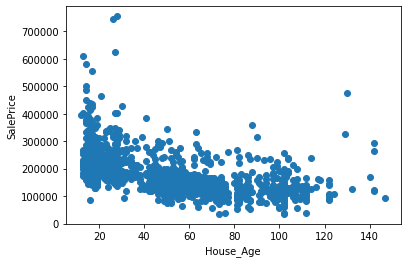

In [23]:
plt.scatter(x=df_dropped['Age'], y=df_dropped['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

## Getting Dummies

In [24]:
#regenerating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [25]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[NonNumCols], drop_first=True)

In [26]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1161, 280)

In [27]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1161, 241)

## Train Test Split

In [28]:
x = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.505978,-0.035165,-0.619205,-0.070165,-0.534154,-0.416711,-0.560551,-0.699777,-0.286321,0.864946,...,-0.065767,-0.058798,-0.312015,-0.050899,0.408453,-0.058798,-0.097802,-0.125491,0.482166,-0.315328
1,-0.876905,1.079100,0.602288,1.371633,0.355592,-0.705404,-0.560551,-0.199287,4.734980,1.054106,...,-0.065767,-0.058798,-0.312015,-0.050899,0.408453,-0.058798,-0.097802,-0.125491,0.482166,-0.315328
2,0.076248,0.945388,-0.061676,0.650734,-0.534154,0.593714,-0.560551,0.907859,-0.286321,-0.699517,...,-0.065767,-0.058798,-0.312015,-0.050899,0.408453,-0.058798,-0.097802,-0.125491,0.482166,-0.315328
3,-0.876905,1.524806,0.142818,-0.070165,0.355592,-0.368595,2.069342,0.567699,-0.286321,1.267745,...,-0.065767,-0.058798,-0.312015,-0.050899,-2.448260,-0.058798,-0.097802,-0.125491,0.482166,-0.315328
4,-0.876905,-0.035165,0.688285,-0.070165,1.245338,0.738061,0.129796,1.739843,-0.286321,-0.474750,...,-0.065767,-0.058798,-0.312015,-0.050899,0.408453,-0.058798,-0.097802,-0.125491,0.482166,-0.315328


## Choosing Random State Values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.2, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (812, 240)
X_test Shape: (233, 240)
y_train Shape: (812,)
y_test Shape: (233,)


## Model Selection and Hyper Parameter Tuning

## Ridge Regression

In [36]:
# list of alphas to tune

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078308,0.123507,0.007921,0.007874,0.0001,{'alpha': 0.0001},-25743.015484,-24412.713037,-20500.388430,-21670.260470,...,-23893.710353,2477.909385,28,-12173.891608,-12709.331648,-11952.383113,-11881.957461,-12535.316224,-12250.576011,323.175761
1,0.019404,0.006571,0.006546,0.008032,0.001,{'alpha': 0.001},-25740.959777,-24411.340657,-20499.123926,-21668.827536,...,-23892.186036,2477.756295,27,-12173.943928,-12709.297942,-11952.291185,-11882.101915,-12535.411732,-12250.609340,323.164560
2,0.019571,0.005868,0.009597,0.007846,0.01,{'alpha': 0.01},-25720.592510,-24397.575051,-20486.470201,-21654.887209,...,-23877.150672,2476.319620,26,-12174.494316,-12708.961904,-11951.414296,-11883.515450,-12536.421647,-12250.961523,323.061673
3,0.021871,0.002338,0.012602,0.004407,0.05,{'alpha': 0.05},-25633.679074,-24335.760290,-20430.444646,-21600.178924,...,-23814.404289,2471.728511,25,-12177.389651,-12707.644501,-11950.342397,-11889.918928,-12540.600393,-12253.179174,322.044054
4,0.018325,0.002524,0.009284,0.002672,0.1,{'alpha': 0.1},-25531.516648,-24257.904669,-20361.888206,-21544.252686,...,-23743.141987,2468.603753,24,-12182.113425,-12706.386449,-11955.651274,-11897.296257,-12545.278177,-12257.345116,319.642841


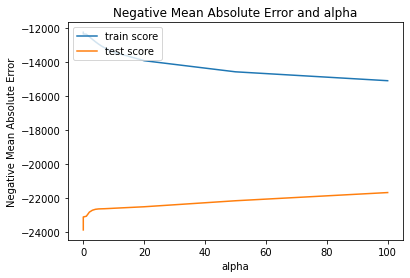

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.75593559e+03, -9.67437492e+02,  5.44118485e+03,  1.17732244e+04,
        4.69549204e+03,  2.39961491e+03,  7.15993582e+03,  2.21809364e+03,
        1.70924270e+03, -1.65679360e+03,  1.26788752e+03,  3.95433416e+03,
       -5.48307834e+02,  2.63213267e+04,  2.58405629e+03,  4.01994972e+02,
        4.40211673e+03,  2.28992127e+03, -1.02408665e+03, -6.08354808e+02,
        2.55085710e+03, -1.08455359e+02,  7.77638907e+03,  1.99006287e+03,
        3.21242910e+02,  5.38503796e+02,  1.52321800e+03,  1.87710017e+03,
       -7.91176900e+01, -5.54559937e+02, -2.31420340e+03, -1.16502488e+03,
       -5.32120376e+03,  4.89935387e+03,  1.40820772e+03,  9.06828174e+03,
        5.84315635e+03,  1.93375417e+02,  2.93208554e+02, -3.26630363e+03,
        6.28903591e+02,  9.82082324e+02, -1.26014294e+03,  1.08776368e+03,
        5.08208579e+03, -8.29279671e+02, -1.01868095e+03,  8.35461893e+02,
       -2.38979196e+02, -5.55764715e+03,  1.10288931e+02,  3.33974958e+02,
       -8.70638090e+02, -

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.357604,0.165343,0.008530,0.001849,0.0001,{'alpha': 0.0001},-26467.067789,-24882.011039,-21098.555146,-22080.637516,...,-24326.149881,2368.974547,28,-12193.191090,-12709.958261,-11946.668198,-11893.116730,-12551.796491,-12258.946154,323.989400
1,0.227840,0.032524,0.007603,0.002262,0.001,{'alpha': 0.001},-26467.106007,-24881.556000,-21098.490759,-22080.119576,...,-24325.935357,2369.058623,27,-12193.188531,-12709.955242,-11946.668420,-11893.115154,-12551.794656,-12258.944400,323.988645
2,0.217250,0.037371,0.009011,0.002056,0.01,{'alpha': 0.01},-26467.487366,-24877.005665,-21097.846893,-22074.947152,...,-24323.791744,2369.899386,26,-12193.162941,-12709.932608,-11946.672489,-11893.100829,-12551.777835,-12258.929341,323.982792
3,0.211698,0.015192,0.009610,0.002848,0.05,{'alpha': 0.05},-26469.174927,-24856.238925,-21094.985416,-22051.963229,...,-24314.167756,2373.645942,25,-12193.049230,-12709.866833,-11946.713076,-11893.096951,-12551.718466,-12258.888911,323.951419
4,0.215525,0.012771,0.008017,0.007488,0.1,{'alpha': 0.1},-26471.270916,-24829.989802,-21091.408891,-22023.256552,...,-24302.101310,2378.385238,24,-12192.919412,-12709.819893,-11946.781276,-11893.268234,-12551.709451,-12258.899653,323.890181


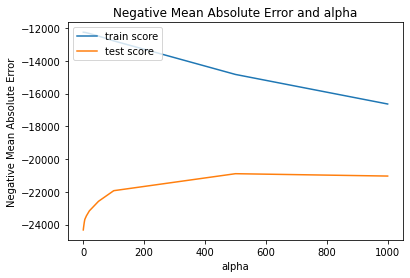

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [44]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


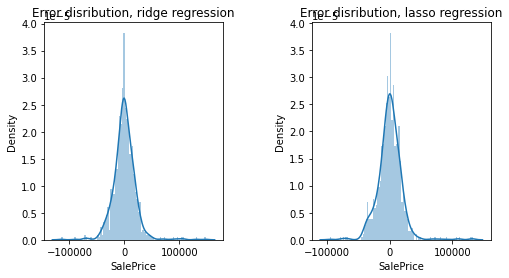

In [45]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [46]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9342962102290139
r2_score for lasso: 0.9405333086737313


In [47]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


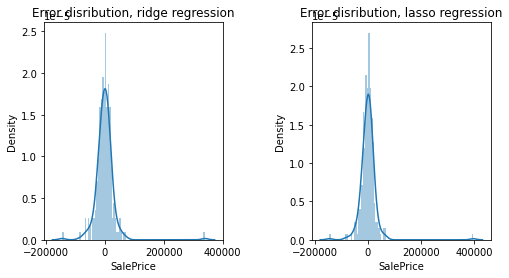

In [48]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [49]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.93
r2_score for lasso: 0.94
r2_score in test dataset:
r2_score for ridge: 0.8
r2_score for lasso: 0.78


In [52]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 180363.014),
 ('MSSubClass', -3806.622),
 ('LotFrontage', 872.793),
 ('LotArea', 6174.167),
 ('OverallQual', 11001.282),
 ('OverallCond', 5549.627),
 ('YearRemodAdd', 2271.671),
 ('MasVnrArea', 6441.109),
 ('BsmtFinSF1', 6853.722),
 ('BsmtFinSF2', 1831.416),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 3237.691),
 ('2ndFlrSF', 91.852),
 ('LowQualFinSF', -1436.791),
 ('GrLivArea', 33035.835),
 ('BsmtFullBath', 1147.399),
 ('BsmtHalfBath', 32.869),
 ('FullBath', 1778.919),
 ('HalfBath', 1072.286),
 ('BedroomAbvGr', -2930.49),
 ('KitchenAbvGr', -1023.742),
 ('Fireplaces', 1455.713),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 6263.855),
 ('WoodDeckSF', 1089.771),
 ('OpenPorchSF', 685.718),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 866.927),
 ('ScreenPorch', 1658.837),
 ('PoolArea', 902.769),
 ('MiscVal', -298.996),
 ('MoSold', -1963.385),
 ('YrSold', -670.917),
 ('Age', -9304.84),
 ('MSZoning_FV', 3656.453),
 ('MSZoning_RH', 198.742),
 ('MSZoning_RL', 5993.379),
 ('MSZoning_RM', 2464.82

In [53]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 180363.014),
 ('MSSubClass', -3806.622),
 ('LotFrontage', 872.793),
 ('LotArea', 6174.167),
 ('OverallQual', 11001.282),
 ('OverallCond', 5549.627),
 ('YearRemodAdd', 2271.671),
 ('MasVnrArea', 6441.109),
 ('BsmtFinSF1', 6853.722),
 ('BsmtFinSF2', 1831.416),
 ('TotalBsmtSF', 3237.691),
 ('2ndFlrSF', 91.852),
 ('LowQualFinSF', -1436.791),
 ('GrLivArea', 33035.835),
 ('BsmtFullBath', 1147.399),
 ('BsmtHalfBath', 32.869),
 ('FullBath', 1778.919),
 ('HalfBath', 1072.286),
 ('BedroomAbvGr', -2930.49),
 ('KitchenAbvGr', -1023.742),
 ('Fireplaces', 1455.713),
 ('GarageCars', 6263.855),
 ('WoodDeckSF', 1089.771),
 ('OpenPorchSF', 685.718),
 ('3SsnPorch', 866.927),
 ('ScreenPorch', 1658.837),
 ('PoolArea', 902.769),
 ('MiscVal', -298.996),
 ('MoSold', -1963.385),
 ('YrSold', -670.917),
 ('Age', -9304.84),
 ('MSZoning_FV', 3656.453),
 ('MSZoning_RH', 198.742),
 ('MSZoning_RL', 5993.379),
 ('MSZoning_RM', 2464.821),
 ('Street_Pave', 858.785),
 ('LotShape_IR2', 173.698),
 ('LotShape_

In [54]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(df_dropped):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Age']
67


In [55]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SaleType', 'SaleCondition']
50


In [56]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
37


## Conclusion

1.Optimum value for lambda in ridge regression is 10

2.Optimum value for lambda in lasso regression is 100

3.So, the company can purchase houses below the market value by highlighting the negative parameters.

4.Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.